# Import necessary libraries

In [34]:
import os
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import *
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Unzipping dataset

In [37]:
!unzip -o "/content/brain tumor dataset.zip"
print("Dataset extracted successfully.")

Archive:  /content/brain tumor dataset.zip
   creating: brain tumor dataset/no/
  inflating: brain tumor dataset/no/no0.jpg  
  inflating: brain tumor dataset/no/no1.jpg  
  inflating: brain tumor dataset/no/no10.jpg  
  inflating: brain tumor dataset/no/no100.jpg  
  inflating: brain tumor dataset/no/no101.jpg  
  inflating: brain tumor dataset/no/no102.jpg  
  inflating: brain tumor dataset/no/no103.jpg  
  inflating: brain tumor dataset/no/no104.jpg  
  inflating: brain tumor dataset/no/no105.jpg  
  inflating: brain tumor dataset/no/no106.jpg  
  inflating: brain tumor dataset/no/no107.jpg  
  inflating: brain tumor dataset/no/no108.jpg  
  inflating: brain tumor dataset/no/no109.jpg  
  inflating: brain tumor dataset/no/no11.jpg  
  inflating: brain tumor dataset/no/no110.jpg  
  inflating: brain tumor dataset/no/no111.jpg  
  inflating: brain tumor dataset/no/no112.jpg  
  inflating: brain tumor dataset/no/no113.jpg  
  inflating: brain tumor dataset/no/no114.jpg  
  inflating: b

# Renaming the files


In [38]:
# Define the path to the dataset directory
dataset_dir = '/content/brain tumor dataset'

# Define the target class names and their respective subdirectories
class_names = ['normal', 'tumor']

# Loop through the class names and rename the images accordingly
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.exists(class_dir):
        # Get a list of all image files in the class directory
        image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

        # Rename the images sequentially
        for i, image_file in enumerate(image_files, start=1):
            old_path = os.path.join(class_dir, image_file)
            new_name = f"{class_name}_image_{i}.jpg"
            new_path = os.path.join(class_dir, new_name)

            # Rename the image file
            os.rename(old_path, new_path)
            print(f"Renamed: {old_path} -> {new_path}")
    else:
        print(f"Directory '{class_dir}' not found.")

print("Image renaming completed.")

Renamed: /content/brain tumor dataset/normal/no3.jpg -> /content/brain tumor dataset/normal/normal_image_1.jpg
Renamed: /content/brain tumor dataset/normal/no5.jpg -> /content/brain tumor dataset/normal/normal_image_2.jpg
Renamed: /content/brain tumor dataset/normal/no120.jpg -> /content/brain tumor dataset/normal/normal_image_3.jpg
Renamed: /content/brain tumor dataset/normal/no150.jpg -> /content/brain tumor dataset/normal/normal_image_4.jpg
Renamed: /content/brain tumor dataset/normal/no77.jpg -> /content/brain tumor dataset/normal/normal_image_5.jpg
Renamed: /content/brain tumor dataset/normal/no103.jpg -> /content/brain tumor dataset/normal/normal_image_6.jpg
Renamed: /content/brain tumor dataset/normal/No14.jpg -> /content/brain tumor dataset/normal/normal_image_7.jpg
Renamed: /content/brain tumor dataset/normal/no104.jpg -> /content/brain tumor dataset/normal/normal_image_8.jpg
Renamed: /content/brain tumor dataset/normal/no129.jpg -> /content/brain tumor dataset/normal/normal_i

# Plotting some random images from the dataset

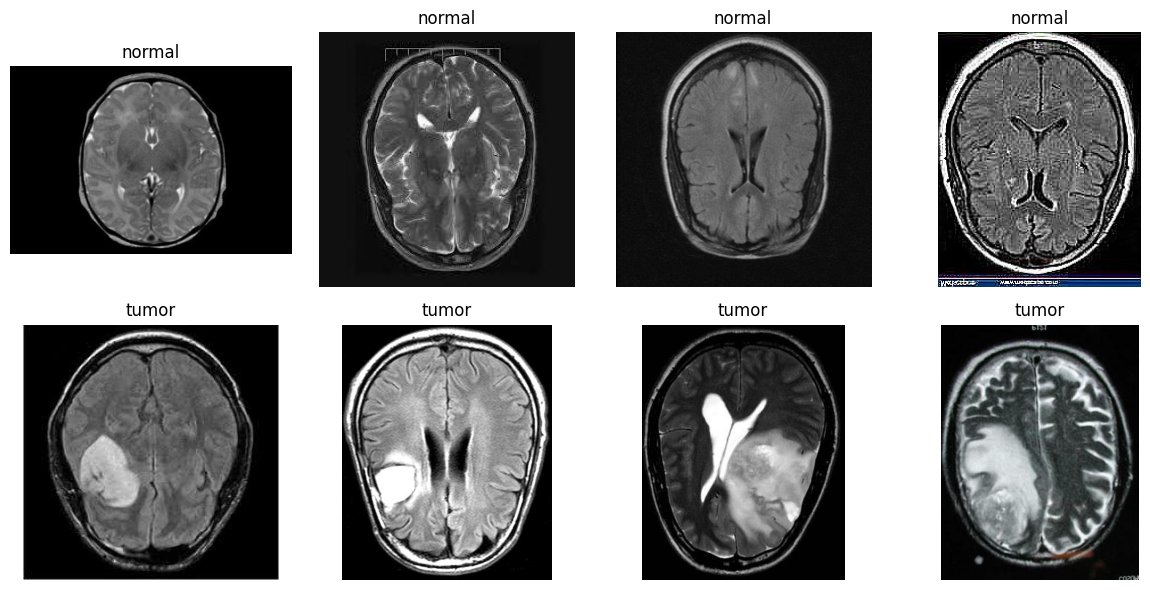

In [50]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
dataset_dir = '/content/brain tumor dataset'

# Define the target class names
class_names = ['normal', 'tumor']

# Create a subplot for 8 images (4 normal and 4 tumor)
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Loop through the class names and plot random images
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith('.jpg')]

    # Randomly select 4 images from each class
    random.shuffle(image_files)
    selected_images = image_files[:4]

    # Plot the selected images
    for j, image_file in enumerate(selected_images):
        image_path = os.path.join(class_dir, image_file)
        img = mpimg.imread(image_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Function to load and preprocess images

In [60]:
# Define constants
DATASET_DIR = '/content/brain tumor dataset'
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20

# Function to load and preprocess images
def load_and_preprocess_data(dataset_dir):
    image_list = []
    label_list = []

    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder_name)
        label = 1 if folder_name.startswith('tumor') else 0

        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
            img = tf.keras.preprocessing.image.img_to_array(img)
            img /= 255.0  # Normalize pixel values
            image_list.append(img)
            label_list.append(label)

    print(f"Loaded {len(image_list)} images.")
    return np.array(image_list), np.array(label_list)

# Load and preprocess data
images, labels = load_and_preprocess_data(DATASET_DIR)

Loaded 402 images.


# Split data into training and testing sets

In [61]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
print(f"Split data into {len(X_train)} training samples and {len(X_test)} testing samples.")

Split data into 281 training samples and 121 testing samples.


# Data augmentation for the training set

In [56]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

# Convolutional Neural Network (CNN) model

In [57]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE), epochs=EPOCHS, validation_data=(X_test, y_test))
print("CNN model training completed.")

Epoch 1/20
9/9 [==============================] - 3s 161ms/step - loss: 0.7444 - accuracy: 0.5552 - val_loss: 0.6644 - val_accuracy: 0.5455
Epoch 2/20
9/9 [==============================] - 2s 206ms/step - loss: 0.6265 - accuracy: 0.6441 - val_loss: 0.4914 - val_accuracy: 0.7355
Epoch 3/20
9/9 [==============================] - 1s 122ms/step - loss: 0.5132 - accuracy: 0.7402 - val_loss: 0.4845 - val_accuracy: 0.8182
Epoch 4/20
9/9 [==============================] - 1s 127ms/step - loss: 0.4465 - accuracy: 0.8292 - val_loss: 0.4829 - val_accuracy: 0.7686
Epoch 5/20
9/9 [==============================] - 1s 127ms/step - loss: 0.4623 - accuracy: 0.7722 - val_loss: 0.5092 - val_accuracy: 0.8182
Epoch 6/20
9/9 [==============================] - 1s 126ms/step - loss: 0.4271 - accuracy: 0.8078 - val_loss: 0.4082 - val_accuracy: 0.8347
Epoch 7/20
9/9 [==============================] - 1s 128ms/step - loss: 0.4109 - accuracy: 0.8505 - val_loss: 0.4915 - val_accuracy: 0.8512
Epoch 8/20
9/9 [====

# Random Forest classifier

In [58]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train.reshape(-1, 128 * 128 * 3), y_train)
print("Random Forest model training completed.")

Random Forest model training completed.


# Printing different graphs and accuracy values

CNN Model:
Train Accuracy: 93.59%
Test Accuracy: 85.12%

Random Forest Model:
Train Accuracy: 100.00%
Test Accuracy: 83.47%


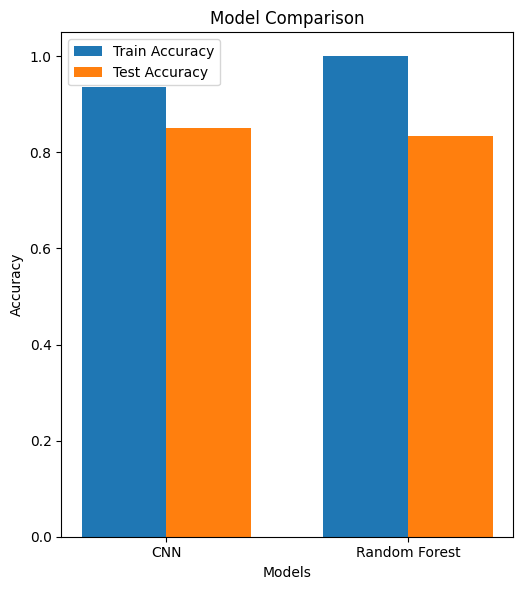

In [59]:
# Evaluate and print the accuracies of the models on the training and test sets
cnn_train_accuracy = cnn_model.evaluate(X_train, y_train, verbose=0)[1]
cnn_test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)[1]
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train.reshape(-1, 128 * 128 * 3)))
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test.reshape(-1, 128 * 128 * 3)))

print("CNN Model:")
print(f"Train Accuracy: {cnn_train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

print("\nRandom Forest Model:")
print(f"Train Accuracy: {rf_train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {rf_test_accuracy * 100:.2f}%")

# Plot the accuracy history for the CNN model
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
# Plot a bar chart comparing the accuracies of CNN and Random Forest
model_names = ['CNN', 'Random Forest']
train_accuracies = [cnn_train_accuracy, rf_train_accuracy]
test_accuracies = [cnn_test_accuracy, rf_test_accuracy]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, model_names)
plt.legend()

plt.tight_layout()
plt.show()